<a href="https://colab.research.google.com/github/GivanTsai/Bert-cookbook/blob/main/Inspect_Bert_Vocabulary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pytorch-pretrained-bert

In [2]:
import torch 
from pytorch_pretrained_bert import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [3]:
with open("vocabulary.txt", "w") as f:

    for token in tokenizer.vocab.keys():
        f.write(token + "\n")

In [4]:
one_chars = []
one_chars_hash = []

for token in tokenizer.vocab.keys():

    if len(token) == 1:
        one_chars.append(token)

    elif len(token) == 3 and token[0:2] == '##':
        one_chars_hash.append(token)

In [5]:
print("Number of single character tokens:", len(one_chars), "\n")

# print out all the single characters, 40 per row.

# Strip the hash marks. since they just clutter the display.
tokens = [token.replace("##", "") for token in one_chars_hash]

# For every batch of 40 tokens...
for i in range(0, len(one_chars), 40):

    # Limit the end index so we don't go past the end of the list.
    end = min(i + 40, len(one_chars) + 1)

    # Print out the tokens, separated by a space.
    print(" ".join(one_chars[i:end]))

Number of single character tokens: 997 

! " # $ % & ' ( ) * + , - . / 0 1 2 3 4 5 6 7 8 9 : ; < = > ? @ [ \ ] ^ _ ` a b
c d e f g h i j k l m n o p q r s t u v w x y z { | } ~ ¡ ¢ £ ¤ ¥ ¦ § ¨ © ª « ¬
® ° ± ² ³ ´ µ ¶ · ¹ º » ¼ ½ ¾ ¿ × ß æ ð ÷ ø þ đ ħ ı ł ŋ œ ƒ ɐ ɑ ɒ ɔ ɕ ə ɛ ɡ ɣ ɨ
ɪ ɫ ɬ ɯ ɲ ɴ ɹ ɾ ʀ ʁ ʂ ʃ ʉ ʊ ʋ ʌ ʎ ʐ ʑ ʒ ʔ ʰ ʲ ʳ ʷ ʸ ʻ ʼ ʾ ʿ ˈ ː ˡ ˢ ˣ ˤ α β γ δ
ε ζ η θ ι κ λ μ ν ξ ο π ρ ς σ τ υ φ χ ψ ω а б в г д е ж з и к л м н о п р с т у
ф х ц ч ш щ ъ ы ь э ю я ђ є і ј љ њ ћ ӏ ա բ գ դ ե թ ի լ կ հ մ յ ն ո պ ս վ տ ր ւ
ք ־ א ב ג ד ה ו ז ח ט י ך כ ל ם מ ן נ ס ע ף פ ץ צ ק ר ש ת ، ء ا ب ة ت ث ج ح خ د
ذ ر ز س ش ص ض ط ظ ع غ ـ ف ق ك ل م ن ه و ى ي ٹ پ چ ک گ ں ھ ہ ی ے अ आ उ ए क ख ग च
ज ट ड ण त थ द ध न प ब भ म य र ल व श ष स ह ा ि ी ो । ॥ ং অ আ ই উ এ ও ক খ গ চ ছ জ
ট ড ণ ত থ দ ধ ন প ব ভ ম য র ল শ ষ স হ া ি ী ে க ச ட த ந ன ப ம ய ர ல ள வ ா ி ு ே
ை ನ ರ ಾ ක ය ර ල ව ා ก ง ต ท น พ ม ย ร ล ว ส อ า เ ་ ། ག ང ད ན པ བ མ འ ར ལ ས မ ა
ბ გ დ ე ვ თ ი კ ლ მ ნ ო რ ს ტ უ ᄀ ᄂ ᄃ ᄅ ᄆ ᄇ ᄉ ᄊ ᄋ ᄌ ᄎ ᄏ ᄐ ᄑ ᄒ ᅡ ᅢ ᅥ ᅦ ᅧ ᅩ ᅪ ᅭ ᅮ

In [6]:
print("Are the two sets identical?", set(one_chars) == set(tokens))

Are the two sets identical? True


Let's gather some statistics on the vocabulary.

Maximum token length: 18


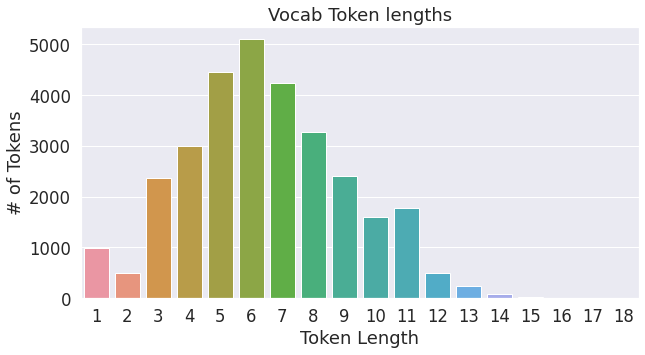

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="darkgrid")

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams['figure.figsize'] = (10,5)

# Measure the length of every token in the vocab.
token_lenghts = [len(token) for token in tokenizer.vocab.keys()]

# Plot the number of tokens of each length
sns.countplot(x=token_lenghts)
plt.title("Vocab Token lengths")
plt.xlabel("Token Length")
plt.ylabel("# of Tokens")

print("Maximum token length:", max(token_lenghts))

Let's look at just the tokens which begins with "##".

In [8]:
num_subwords = 0

subword_lengths = []

for token in tokenizer.vocab.keys():

    if len(token) > 2 and token.startswith("##"):
        num_subwords += 1

        length = len(token) - 2
        subword_lengths.append(length)

How many '##' tokens are there vs. the full vocab?

In [9]:
vocab_size = len(tokenizer.vocab.keys())

print("Number of subwords: {:,} of {:,}".format(num_subwords, vocab_size))

prcnt = float(num_subwords) / vocab_size * 100

print("%.1f%%" % prcnt)

Number of subwords: 5,828 of 30,522
19.1%


Plot the subword lengths

Text(0, 0.5, '# of ## Subwords')

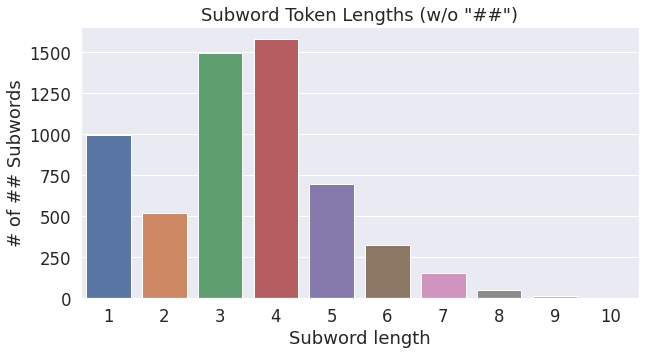

In [10]:
sns.countplot(x=subword_lengths)
plt.title('Subword Token Lengths (w/o "##")')
plt.xlabel('Subword length')
plt.ylabel('# of ## Subwords')